# KNN

## Import libraries

In [96]:
# Sirve para actualizar el modulo despues de haber cambiado algo en el codigo de los modulos importados
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [97]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
from seaborn import violinplot
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 

In [98]:
# Modulos propios del proyecto que se encuentran en el directorio src
from src.utils.paths import data_dir
from src.visualization.word_cloud import words_cloud
from src.utils.paths import references_dir

from src.utils.metrics import display_and_plot_all_metrics


## Set up

In [99]:
# Configuracion de opciones

# Configuramos para que muestre siempre todas las columnas disponibles
pd.options.display.max_columns = None

# Cambio del tamaño de los plots para seaborn
sns.set(rc={'figure.figsize':(10,5)})

# Definimos el color para los plots
COLOR_VINO_TINTO = "#7C3030"
COLOR__VINO_BLANCO = "#ffffbf"

## Read Data

In [100]:
# Obtenemos la ruta de los csv's que vamos a utilizar
WINES_FINAL_CSV_PATH = data_dir("processed", "df_wine_final.csv")

print(f"{WINES_FINAL_CSV_PATH}")

c:\Users\cvigo\data-projects\proyecto-final-vinos\vinos-corderhouse\data\processed\df_wine_final.csv


In [101]:
df_wines = pd.read_csv(WINES_FINAL_CSV_PATH)

In [102]:
df_wines.sample(10)

,PC1,PC2,PC5,PC6,PC7,quality_low,style
723,0.201439,0.111728,-0.106175,-0.133411,0.018850,0,1
330,-0.520359,0.603715,0.120295,0.291388,0.065053,0,2
1565,-0.169534,-0.066675,-0.401467,-0.282216,0.123599,1,1
1848,0.106936,-0.149794,-0.062187,0.025940,0.098637,0,1
744,-0.184058,-0.021312,-0.023671,-0.218987,0.020377,0,1
2338,0.396955,0.029874,-0.160605,0.009443,0.246332,1,1
4685,0.759482,-0.075509,0.100948,0.046850,0.090575,0,1
1141,-0.458189,-0.139366,-0.189560,0.293623,-0.158811,1,1
3359,-0.110844,-0.313632,-0.004987,0.367702,0.012620,0,1
4073,-0.200253,-0.313075,0.375863,0.255363,-0.252355,0,1


# Preparamos los datos

In [103]:
#Seperamos en X e y
#Elimino de mi dataset la variable a predecir
X = df_wines.drop(columns=["quality_low"])
y = df_wines.quality_low #Defino el Target

In [104]:
# Me quedo con 30% para test (validación) y 70% para train (entrenamiento)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [105]:
X_train.shape, X_test.shape

((3509, 6), (1504, 6))

# KNN

In [106]:
knn = KNeighborsClassifier(n_neighbors=5)
y_train_pred = knn.fit(X_train,y_train) 

In [107]:
y_test_pred = knn.predict(X_test) #Prediccion en Test

# Metricas

# Metricas: 

### Metricas calculadas

,roc_auc,accuracy,precision,f1,recall
value,0.8,0.75,0.63,0.6,0.57


### Grafico de confusion matrix: 

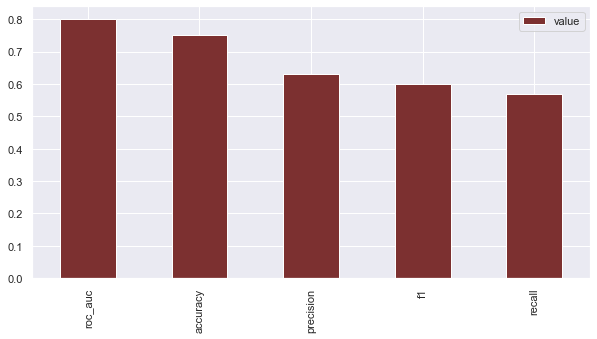

<Figure size 720x720 with 0 Axes>

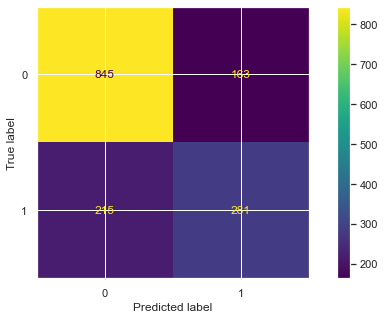

### Grafico de roc: 

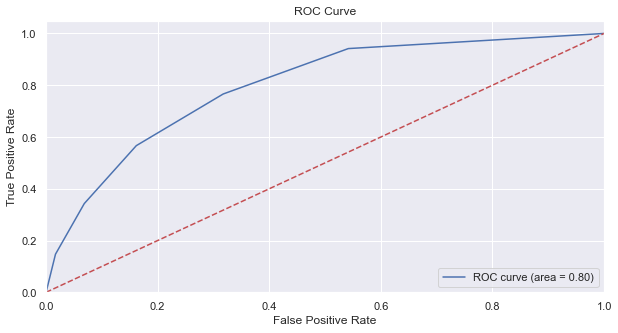

In [108]:
display_and_plot_all_metrics(knn,X_test,y_test,y_test_pred)